<a href="https://colab.research.google.com/github/hahachang/colab/blob/main/JobsBioParse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定

In [1]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb

# Install selenium
!pip install selenium

!pip install webdriver-manager
!pip install chromedriver-py

--2024-08-29 05:59:14--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.141.136, 142.250.141.93, 142.250.141.91, ...
Connecting to dl.google.com (dl.google.com)|142.250.141.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110831940 (106M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 105.70M   105MB/s    in 1.0s    

2024-08-29 05:59:15 (105 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [110831940/110831940]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded

In [3]:
#環境設定
#!pip install selenium==4.0.0.b3
#!pip install selenium
#!apt-get update # to update ubuntu to correctly run apt install
#!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin



#wget https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
#!unzip /content/colab/chromedriver_linux64.zip
#!cp /content/colab/chromedriver /usr/lib
#!cp /content/colab/chromedriver /usr/bin

#sys.path.insert(0,'/usr/bin/chromedriver')
!sudo apt install tesseract-ocr
!pip install pytesseract

cp: cannot stat '/usr/lib/chromium-browser/chromedriver': No such file or directory
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,986 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program

# 共通程式

In [21]:
# Line Notify
def Line(msg,path_pic=None):
    import requests
    global tokenDropbox
    tokenLine = 'apfSt2nGRwzBuCuFWtH9qRCX8BGATHEyCiBAIQzAwup'

    headers = {
        "Authorization": "Bearer " + tokenLine
    }
    payload = {'message': msg}
    if path_pic!=None:
      files = {'imageFile':open(path_pic,'rb')}
      r = requests.post("https://notify-api.line.me/api/notify", headers = headers, params = payload,files=files)
    else:
      r = requests.post("https://notify-api.line.me/api/notify", headers = headers, params = payload)
    return r.status_code

def SendFileToDropbox(fileLocal,fileDropbox):
    ##### upload file to dropbox #####

    try:
        import dropbox
        #print("module is installed")
    except ModuleNotFoundError:
        print("module is not installed")
        # or
        !pip install dropbox
        import dropbox

    from dropbox.files import WriteMode
    from dropbox.exceptions import ApiError, AuthError
    global tokenDropbox
    tokenDropbox = "9VjbJCirSqsAAAAAAAA1JuBzv7mujcQGbebgTGu2IjDup-N77QjVY8MEsg1ccizx"
    dbx = dropbox.Dropbox(tokenDropbox)
    with open(fileLocal, 'rb') as f:
      dbx.files_upload(f.read(), "/"+fileDropbox, mode=WriteMode('overwrite'))
      f.close()


def GetFileFromDropbox(fileDropbox,fileLocal):
    ##### download file frome dropbox #####
    try:
        import dropbox
        #print("module is installed")
    except ModuleNotFoundError:
        print("module is not installed")
        # or
        !pip install dropbox
        import dropbox

    from dropbox.files import WriteMode
    from dropbox.exceptions import ApiError, AuthError
    global tokenDropbox
    tokenDropbox = "9VjbJCirSqsAAAAAAAA1JuBzv7mujcQGbebgTGu2IjDup-N77QjVY8MEsg1ccizx"
    dbx = dropbox.Dropbox(tokenDropbox)
    with open(fileLocal, "wb") as f:
      metadata, res = dbx.files_download("/"+fileDropbox)
      f.write(res.content)

In [22]:
#設定
import sys
import os
import base64
import datetime
import time
import json
import pandas as pd

from datetime import datetime,timedelta
from pathlib import Path
from urllib.parse import urlparse
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromiumService
from webdriver_manager.chrome import ChromeDriverManager
#from webdriver_manager.core.utils import ChromeType


#global
#global tokenDropbox,tokenLine
#tokenDropbox = "9VjbJCirSqsAAAAAAAA1JuBzv7mujcQGbebgTGu2IjDup-N77QjVY8MEsg1ccizx"
#tokenLine = 'apfSt2nGRwzBuCuFWtH9qRCX8BGATHEyCiBAIQzAwup'

#設定Selenium
#options = webdriver.ChromeOptions()
#options.add_argument('--headless')
#options.add_argument('--no-sandbox')
#options.add_argument('--disable-dev-shm-usage')

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-dev-shm-usage')

#options.headless = True

prjName = "OCR_Img_twse_bsr"

headLess = True

Path(prjName).mkdir(parents=True, exist_ok=True)

# 如要使用Chrome瀏覽器，需使用相對應版本的ChromeDriver
# Src: https://chromedriver.chromium.org/
wdPath = '/usr/lib/chromium-browser/chromedriver'
#wdPath = '/usr/lib/chromedriver'

# 函數:Stock

In [23]:
def StartdayParseStock():
  from datetime import datetime, timedelta
  if (datetime.now()+timedelta(hours=8)).strftime("%H%M%S")<"160000":
    date   = (datetime.now()+timedelta(hours=8)+timedelta(days=-1)).strftime("%Y%m%d")
  else:
    date   = (datetime.now()+timedelta(hours=8)).strftime("%Y%m%d")
  return date

global dateStartday
dateStartday =  StartdayParseStock()
print("======  " +  dateStartday  + "  ======"  )
#dateStartday="20210514"

======  20240828  ======


# 主程式:StockBio

In [68]:
def ParseBioCSV(stock):
  print('chromedriver is lunching..')
  wd = webdriver.Chrome(options=options)
  #time.sleep(1)
  print('chromedriver is ready..')

  #抓取captcha
  urlString = "https://bsr.twse.com.tw/bshtm/bsMenu.aspx"
  parsed_uri = urlparse(urlString)
  # from urlparse import urlparse  # Python 2
  #result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
  sitePath = '{uri.hostname}'.format(uri=parsed_uri)

  imgPath = prjName + "\\" + sitePath
  Path(imgPath).mkdir(parents=True, exist_ok=True)

  print('get web page....Start')
  wd.get(urlString)
  #time.sleep(1)
  print('get web page....Done')

  def get_captcha_img(): # return saved file's name
      # 此網站的動態驗證碼是存放在 tag img
      #target_img = wd.find_element_by_id("authPic")
      target_img = wd.find_element(By.CSS_SELECTOR,"#Panel_bshtm img")

      # get the canvas as a PNG base64 string
      img_base64 = wd.execute_script("x=arguments[0];c=document.createElement('canvas');c.width=x.width,c.height=x.height;t=c.getContext('2d');t.drawImage(x, 0, 0);return c.toDataURL('image/png').substring(21);", target_img)

      # decode
      img_png = base64.b64decode(img_base64)

      # save to a file
      dtNow = datetime.now()

      fileName = '{}\\{}{}{}_{}{}{}.png'
      fileName = fileName.format(imgPath, dtNow.strftime("%Y"), dtNow.strftime("%m"), dtNow.strftime("%d"), dtNow.strftime("%H"), dtNow.strftime("%M"), dtNow.strftime("%S"))
      with open(fileName, 'wb') as f:
          f.write(img_png)
      return fileName

  fileName=get_captcha_img()

  print('png saved')

  #OCR
  # 載入圖形相關函式

  try:
      from PIL import Image
  except ImportError:
      import Image
  import PIL.ImageOps
  import pytesseract

  from IPython.display import display

  def convert_img1(img, threshold): # 先灰階，轉補色，再黑白處理
      img = img.convert("L")  # 轉為灰階
      img = PIL.ImageOps.invert(img)
      pixels = img.load()
      for x in range(img.width):
          for y in range(img.height):
              if pixels[x, y] > threshold:
                  pixels[x, y] = 255
              else:
                  pixels[x, y] = 0
      return img

  # 8鄰域降燥辨識
  def noise_remove_pil(img, ctrlG, ctrlK): # 8鄰域降噪, ctrlG:小餘折是非白, ctrlK:小於ctrlK個非白點就轉白
      def calculate_noise_count(img_obj, w, h): # 計算鄰域非白色的個數
          count = 0
          width, height = img_obj.size
          for _w_ in [w - 1, w, w + 1]:
              for _h_ in [h - 1, h, h + 1]:
                  if _w_ > width - 1:
                      continue
                  if _h_ > height - 1:
                      continue
                  if _w_ == w and _h_ == h:
                      continue
                  if img_obj.getpixel((_w_, _h_)) < ctrlG:  # 這裡因為是灰度影像，設定小於230為非白色
                      count += 1
          return count

      img = img.convert("L")
      img = PIL.ImageOps.invert(img)
      w, h = img.size

      for _w in range(w):
          for _h in range(h):
              if _w == 0 or _h == 0:
                  img.putpixel((_w, _h), 255)
                  continue
              pixel = img.getpixel((_w, _h))
              if pixel == 255:
                  continue

              # 計算鄰域非白色的個數
              if calculate_noise_count(img, _w, _h) < ctrlK:
                  img.putpixel((_w, _h), 255)
      return img

  captcha4 = Image.open(fileName)
  captcha4 = noise_remove_pil(captcha4, 10, 4)

  result4 = pytesseract.image_to_string(captcha4)
  print(result4)
  #display(captcha4)

  # 二值化降噪辨識，又稱8鄰域降燥，灰階圖辨識與轉黑白後辨識有的時候會不同效益
  def depointImg(img, ctrlV, ctrlK): # 二值化降噪辨識，大於ctrlV是為白點，超過ctrlK個白點轉白
      img = img.convert("L")
      img = PIL.ImageOps.invert(img)
      pixels = img.load()
      w, h = img.size
      for y in range(1, h - 1):
          for x in range(1, w - 1):
              count = 0
              if pixels[x - 1, y - 1] > ctrlV:  # 左上
                  count = count + 1
              if pixels[x,     y - 1] > ctrlV:  # 上
                  count = count + 1
              if pixels[x + 1, y - 1] > ctrlV:  # 右上
                  count = count + 1

              if pixels[x - 1, y] > ctrlV:  # 左
                  count = count + 1
              if pixels[x + 1, y] > ctrlV:  # 右
                  count = count + 1

              if pixels[x - 1, y + 1] > ctrlV:  # 左下
                  count = count + 1
              if pixels[x,     y + 1] > ctrlV:  # 下
                  count = count + 1
              if pixels[x + 1, y + 1] > ctrlV:  # 右下
                  count = count + 1

              if count > ctrlK:
                  pixels[x, y] = 255
      return img


  captcha5 = Image.open(fileName)
  captcha5 = depointImg(captcha5, 10, 4)

  result5 = pytesseract.image_to_string(captcha5)
  print(result5)
  #display(captcha5)

  result4 = result4.replace(' ', '').strip()
  result5 = result5.replace(' ', '').strip()
  print('r4=' + result4)
  print('r5=' + result5)
  display(captcha4)
  display(captcha5)
  captchaCode=''

  if len(result5)==5:
      captchaCode=result5
      print('captcha5 identified!!')
  elif len(result4)==5:
      captchaCode=result4
      print('captcha4 identified!!')
  else:
      print('captcha identify failled!')
      parseSuccess = "No"

  if len(captchaCode)==5:
      txtStkCode = wd.find_element(By.ID,"TextBox_Stkno")
      txtStkCode.send_keys(stock)

      txtCaptcha = wd.find_element(By.NAME,"CaptchaControl1")
      txtCaptcha.send_keys(captchaCode)
      btnOK = wd.find_element(By.NAME,"btnOK")
      btnOK.click()
      try:
          dd = wd.find_element(By.ID,"HyperLink_DownloadCSV")
          dd.click()
          print('file downloading...')
          sleep(10)
          shutil.copy('/root/Downloads/'+ stock + ".csv", '/content/'+ stock +'.csv')
          while not os.path.exists(stock + ".csv"):
            sleep(2)
            print("file downloading..wait")
          parseSuccess = "Yes"
      except NoSuchElementException:
          print('captcha code error!')
          parseSuccess = "No"

  print('chromedriver closing..')
  wd.quit()
  print('chromedriver closed..')

  return parseSuccess


In [25]:
def GetProgressFromDropbox(machine):
  import pandas as pd
  fileProgress = "bio\\"+str(dateStartday)+"\\"+"bio_progress"+str(machine)+".csv"
  GetFileFromDropbox("bio/"+str(dateStartday)+"/"+"bio_progress"+str(machine)+".csv","\\"+fileProgress )
  loopsDropbox = pd.read_csv("\\"+fileProgress, names=["col"],header=None, dtype = str).col.tolist()
  return loopsDropbox

def SendProgressToDropbox(nowProgress,machine):
  import pandas as pd
  fileProgress = "bio\\"+str(dateStartday)+"\\"+"bio_progress" + str(machine) + ".csv"
  pd.DataFrame(nowProgress).to_csv("\\"+fileProgress,index= False,header=False)
  SendFileToDropbox("\\"+fileProgress,"bio/"+str(dateStartday)+"/"+"bio_progress"+str(machine)+".csv")
  print("Send Progress"+ str(machine)+ " to Dropbox ..")

In [8]:
#print("====  "+ "Remain:" +str(len(GetProgressFromDropbox())) + "jobs" + "  =====")

In [26]:
def DynamicLoopsParseBioCSV(machine):
    from pathlib import Path

    bioPath = "bio" + "\\" + str(dateStartday)
    Path(bioPath).mkdir(parents=True, exist_ok=True)

    try:
      loopsDropbox = GetProgressFromDropbox(machine)
      print("get bio progress from dropbox ..")
    except:
      print('error:get bio progress from dropbox ..')
      loopsDropbox = []

    if len(loopsDropbox)==0:
      print("new progress ..")
      if "jf" not in locals() and "jf" not in globals():
        jf  = ParseTWSE_OHLC(dateStartday)
      loops = LoopsTWSE_OHLC(jf)
    else:
      print("continue progress ..")
      loops = loopsDropbox

    return loops,loopsDropbox

In [27]:
def ExecuteLoopsBio(loops):
  Line( str(machine)+": start")
  for stock in loops:
    #line to notify
    #Line( str(machine)+":"+str(stock)+",Remain:"+str(len(loops)) )

    #use selenium to download file
    parseSuccess="No"
    try_counts = 0
    while parseSuccess=="No" and try_counts<=20:
      print("====  "+str(stock)+" parsing .. "+"  ====")
      parseSuccess = ParseBioCSV(stock)
      sleep(randint(5,7))
      clear_output(wait=True)
      try_counts = try_counts+1

    #rename file and send to dropbox
    if parseSuccess == "Yes":
      #Rename file
      timestamp = (datetime.now()+timedelta(hours=8)).strftime("%Y%m%d_%H%M%S")
      boxfile   = str(stock)+"_"+timestamp+".csv"
      os.rename(str(stock)+".csv",boxfile)
      print('renameCSV closed..')

      #send bio to Dropbox
      SendFileToDropbox(boxfile, "bio/"+dateStartday +"/"+ boxfile)
      print('csv to dropbox closed..')

      #send progress to Dropbox
      loops = loops[1:len(loops)]
      SendProgressToDropbox(loops,machine)

renameCSV closed..
csv to dropbox closed..
Send Progress0 to Dropbox ..
====  2317 parsing ..   ====
chromedriver is lunching..
chromedriver is ready..
get web page....Start
get web page....Done
png saved
EYG7A

EY G7A

r4=EYG7A
r5=EYG7A


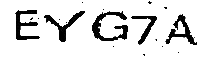

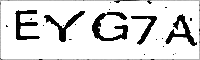

captcha5 identified!!
file downloading...


KeyboardInterrupt: 

In [71]:
from time import sleep
from random import randint
from IPython.display import clear_output
import shutil

wd = webdriver.Chrome(options=options)
loops,loopsDropbox = DynamicLoopsParseBioCSV(machine)
ExecuteLoopsBio(loops)